In [24]:
import os
import io
import fitz
import copy
import base64

from PIL import Image

from pypdf import PdfReader

from typing import List,Dict
from IPython.display import Image as IPImage
from IPython.display import display

In [25]:
# modificar: tiene 3 for 
def get_files (directory: str, fmt: List[str]):
  dict_files:Dict = { f:[] for f in fmt }

  for root,_,files in os.walk (directory):
    for file in files:
      for f in fmt:
        if file.endswith(f):
          dict_files[f].append(os.path.join(root,file))

  return dict_files

data_path_split = os.getcwd().split('\\')
ROOT_PATH = "\\".join(data_path_split[:len(data_path_split)-2])
DATA_PATH = ROOT_PATH + '\\_data\\private\\'

dirs = get_files(DATA_PATH, ['.pdf'])
pdf_dirs = dirs.get( '.pdf' )
pdf_dirs

['d:\\Study\\- PROYECTOS\\python-code-vault\\main\\_data\\private\\documents\\experimental-functions.pdf',
 'd:\\Study\\- PROYECTOS\\python-code-vault\\main\\_data\\private\\documents\\Martin George R R - Cancion De Hielo Y Fuego 01 - Juego de Tronos.pdf',
 'd:\\Study\\- PROYECTOS\\python-code-vault\\main\\_data\\private\\documents\\results_02_acapulco.pdf']

In [44]:
document = PdfReader( pdf_dirs[0] )
no_pages = len(document.pages)

for i,page in enumerate(document.pages):
  print (f"Page {i+1}")
  print (f"Number of word: {len(page.extract_text())}")

Page 1
Number of word: 139
Page 2
Number of word: 806
Page 3
Number of word: 1544
Page 4
Number of word: 1921
Page 5
Number of word: 1504
Page 6
Number of word: 1838
Page 7
Number of word: 1599
Page 8
Number of word: 2481
Page 9
Number of word: 1338
Page 10
Number of word: 2286
Page 11
Number of word: 2103
Page 12
Number of word: 1399
Page 13
Number of word: 1731
Page 14
Number of word: 1895
Page 15
Number of word: 2022
Page 16
Number of word: 1492
Page 17
Number of word: 1499
Page 18
Number of word: 767
Page 19
Number of word: 1093
Page 20
Number of word: 1205
Page 21
Number of word: 970
Page 22
Number of word: 1882
Page 23
Number of word: 1321
Page 24
Number of word: 1059
Page 25
Number of word: 2070
Page 26
Number of word: 1390
Page 27
Number of word: 1312
Page 28
Number of word: 940
Page 29
Number of word: 970
Page 30
Number of word: 849
Page 31
Number of word: 1088
Page 32
Number of word: 1156
Page 33
Number of word: 1539
Page 34
Number of word: 1695
Page 35
Number of word: 1859
P

In [47]:
def pdf_page_to_base64(pdf_path: str, page_number: int):
  pdf_document = fitz.open(pdf_path)
  page = pdf_document.load_page(page_number)
  pix = page.get_pixmap()
  img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

  buffer = io.BytesIO()
  img.save(buffer, format="PNG")

  base64_image = base64.b64encode(buffer.getvalue()).decode("utf-8")
  return base64_image

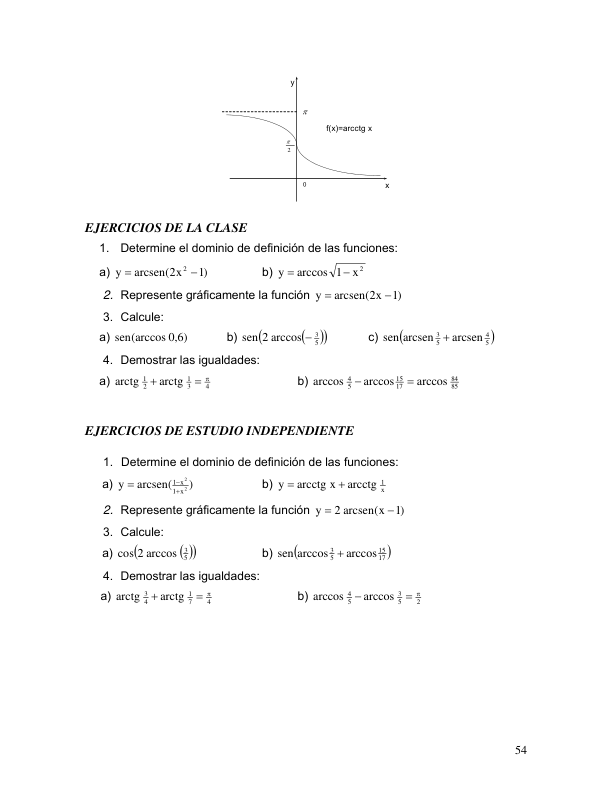

In [ ]:
# TODO : renombrar el nombre del archivo .png que se salva para poder identificar a que documento pertenece

for i in range(no_pages):
  base64_image = pdf_page_to_base64(pdf_dirs[0], i)
  with open(DATA_PATH + f'Page {i}.png', 'wb') as file:
    file.write (base64.b64decode(base64_image))

display(IPImage(data=base64.b64decode(base64_image)))